In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, exposure, filters, feature, color, data
from skimage.feature import hog
import os
import scipy.ndimage as ndi

In [2]:
path = '101'
classes = os.listdir(path)
classes

['accordion',
 'airplanes',
 'anchor',
 'ant',
 'barrel',
 'bass',
 'beaver',
 'binocular',
 'bonsai',
 'brain',
 'brontosaurus',
 'buddha',
 'butterfly',
 'camera',
 'cannon',
 'ceiling_fan',
 'cellphone',
 'chair',
 'chandelier',
 'cougar_body',
 'cougar_face',
 'crab',
 'crayfish',
 'crocodile',
 'crocodile_head',
 'cup',
 'dalmatian',
 'dollar_bill',
 'dolphin',
 'dragonfly',
 'electric_guitar',
 'elephant',
 'emu',
 'euphonium',
 'ewer',
 'Faces',
 'Faces_easy',
 'ferry',
 'flamingo',
 'flamingo_head',
 'garfield',
 'gerenuk',
 'gramophone',
 'grand_piano',
 'hawksbill',
 'headphone',
 'hedgehog',
 'helicopter',
 'ibis',
 'inline_skate',
 'joshua_tree',
 'kangaroo',
 'ketch',
 'lamp',
 'laptop',
 'Leopards',
 'llama',
 'lobster',
 'lotus',
 'mandolin',
 'mayfly',
 'menorah',
 'metronome',
 'minaret',
 'Motorbikes',
 'nautilus',
 'octopus',
 'okapi',
 'pagoda',
 'panda',
 'pigeon',
 'pizza',
 'platypus',
 'pyramid',
 'revolver',
 'rhino',
 'rooster',
 'saxophone',
 'schooner',
 'sc

In [3]:
def imNormalize(image):
    if len(image.shape)==2:
        r = image
        g = image
        b = image
    else:
        r = image[:,:,0]
        g = image[:,:,1]
        b = image[:,:,2]
    
    r = r - r.min()
    r = r / r.max()
    r = np.uint8(r * 255)
    
    g = g - g.min()
    g = g / g.max()
    g = np.uint8(g * 255)
    
    b = b - b.min()
    b = b / b.max()
    b = np.uint8(b * 255)
    
    return np.stack((r,g,b),axis=2) 

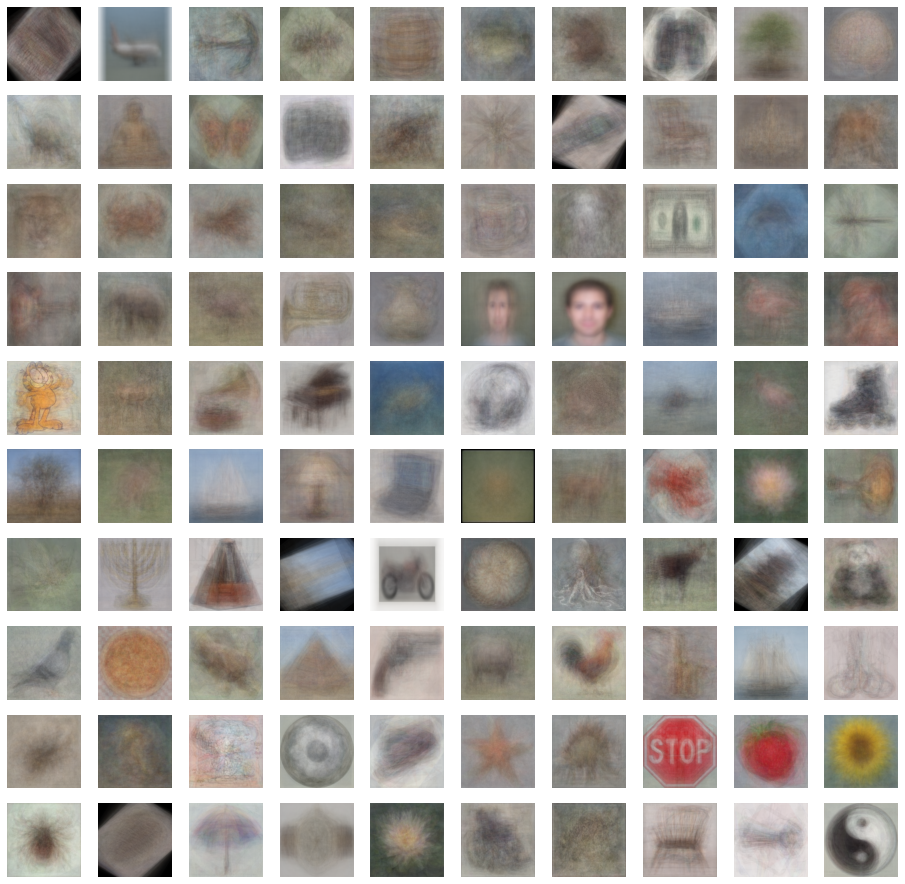

In [19]:
fig = plt.figure(figsize=(16,16))
rows = 10
cols = 10


img_h = []
img_w = []
img_count = []
for classnum in range(len(classes)):
    count = 0
    folder = path + '/' + classes[classnum]
    filelist = os.listdir(folder)
    avg = np.zeros((256,256,3))
    for i in range(len(filelist)):
        filename = folder + '/' + filelist[i]
        image = io.imread(filename)
        image = imNormalize(image)
        img_w.append(image.shape[0])
        img_h.append(image.shape[1])
        image = transform.resize(image,[256,256])
        avg += image
        count += 1
    img_count.append([count, classes[classnum]])
    avg = avg/len(filelist)
    fig.add_subplot(rows, cols, classnum + 1)
    plt.imshow(avg)
    plt.axis('off')
plt.show()

In [20]:
#for question 2
print("max images: ", max(img_count))
print("min images: ", min(img_count))
print("max/min height: ", max(img_h), min(img_h))
print("max/min width: ", max(img_w), min(img_w))
print(img_count)

max images:  [800, 'airplanes']
min images:  [31, 'inline_skate']
max/min height:  708 80
max/min width:  494 92
[[55, 'accordion'], [800, 'airplanes'], [42, 'anchor'], [42, 'ant'], [47, 'barrel'], [54, 'bass'], [46, 'beaver'], [33, 'binocular'], [128, 'bonsai'], [98, 'brain'], [43, 'brontosaurus'], [85, 'buddha'], [91, 'butterfly'], [50, 'camera'], [43, 'cannon'], [47, 'ceiling_fan'], [59, 'cellphone'], [62, 'chair'], [107, 'chandelier'], [47, 'cougar_body'], [69, 'cougar_face'], [73, 'crab'], [70, 'crayfish'], [50, 'crocodile'], [51, 'crocodile_head'], [57, 'cup'], [67, 'dalmatian'], [52, 'dollar_bill'], [65, 'dolphin'], [68, 'dragonfly'], [75, 'electric_guitar'], [64, 'elephant'], [53, 'emu'], [64, 'euphonium'], [85, 'ewer'], [435, 'Faces'], [435, 'Faces_easy'], [67, 'ferry'], [67, 'flamingo'], [45, 'flamingo_head'], [34, 'garfield'], [34, 'gerenuk'], [51, 'gramophone'], [99, 'grand_piano'], [100, 'hawksbill'], [42, 'headphone'], [54, 'hedgehog'], [88, 'helicopter'], [80, 'ibis'], [

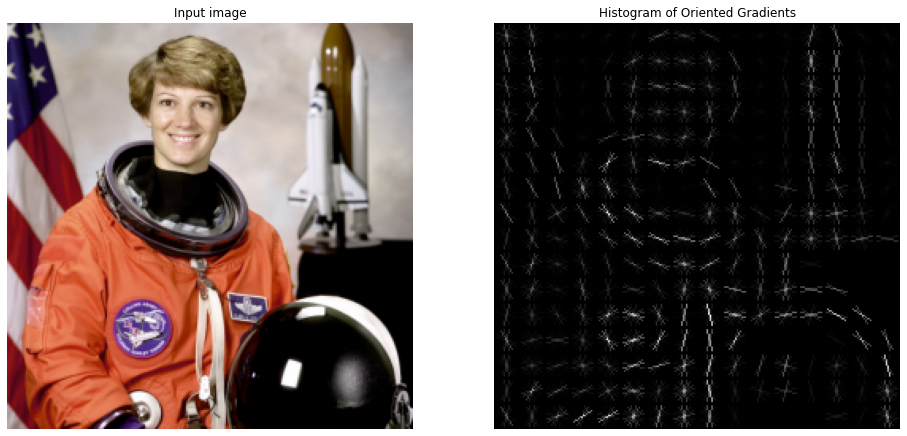

In [14]:
image = data.astronaut()
image = transform.resize(image, [256,256])
fd, hog_image = feature.hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()